In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import load_img

In [26]:
label = []
input_path = []
drive_path = []
dir = "S:\Downloads\spectrograms-20221003T124515Z-001\spectrograms"
drive_dir = "/content/drive/MyDrive/Colab Notebooks/spectrograms-20221003T124515Z-001/spectrograms"


for class_name in os.listdir(dir):
    for path in os.listdir(dir+"/"+class_name):
        if class_name == "0":
            label.append("air conditioner")
        elif class_name == "1":
            label.append("car horn")
        elif class_name == "2":
            label.append("children playing")
        elif class_name == "3":
            label.append("dog bark")
        elif class_name == "4":
            label.append("drilling")
        elif class_name == "5":
            label.append("engine idling")
        elif class_name == "6":
            label.append("gun shot")
        elif class_name == "7":
            label.append("jackhammer")
        elif class_name == "8":
            label.append("siren")
        else:
            label.append("street music")
        input_path.append(os.path.join(dir,class_name,path))
        drive_path.append(os.path.join(drive_dir,class_name,path))

In [27]:
df = pd.DataFrame()
df['input_path'] = input_path
df['drive_path'] = drive_path
df["labels"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,input_path,drive_path,labels
0,S:\Downloads\spectrograms-20221003T124515Z-001...,/content/drive/MyDrive/Colab Notebooks/spectro...,street music
1,S:\Downloads\spectrograms-20221003T124515Z-001...,/content/drive/MyDrive/Colab Notebooks/spectro...,air conditioner
2,S:\Downloads\spectrograms-20221003T124515Z-001...,/content/drive/MyDrive/Colab Notebooks/spectro...,dog bark
3,S:\Downloads\spectrograms-20221003T124515Z-001...,/content/drive/MyDrive/Colab Notebooks/spectro...,jackhammer
4,S:\Downloads\spectrograms-20221003T124515Z-001...,/content/drive/MyDrive/Colab Notebooks/spectro...,drilling


In [28]:
train, test = train_test_split(df, train_size = 0.8, random_state=42)
print(len(train))
print(len(test))

6985
1747


In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode = "nearest"
)

In [30]:
val_generator = ImageDataGenerator(rescale= 1./255)

In [31]:
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col="input_path",
    y_col="labels",
    target_size=(128,128),
    batch_size = 512,
    class_mode = "categorical"
)

Found 6985 validated image filenames belonging to 10 classes.


In [32]:
val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col="input_path",
    y_col="labels",
    target_size=(128,128),
    batch_size = 512,
    class_mode = "categorical"
)

Found 1747 validated image filenames belonging to 10 classes.


In [37]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(padding="same"))

model.add(tf.keras.layers.Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(padding="same"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

In [38]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator)

Epoch 1/5
14/14 [==============================] - 109s 8s/step - loss: 2.1599 - accuracy: 0.1994 - val_loss: 1.8994 - val_accuracy: 0.2971
Epoch 2/5
14/14 [==============================] - 117s 8s/step - loss: 1.8766 - accuracy: 0.3039 - val_loss: 1.6281 - val_accuracy: 0.3932
Epoch 3/5
14/14 [==============================] - 121s 9s/step - loss: 1.6708 - accuracy: 0.3810 - val_loss: 1.4147 - val_accuracy: 0.4848
Epoch 4/5
14/14 [==============================] - 140s 10s/step - loss: 1.5077 - accuracy: 0.4414 - val_loss: 1.2842 - val_accuracy: 0.5381
Epoch 5/5
14/14 [==============================] - 166s 12s/step - loss: 1.3993 - accuracy: 0.4898 - val_loss: 1.2293 - val_accuracy: 0.5610


<Figure size 640x480 with 0 Axes>

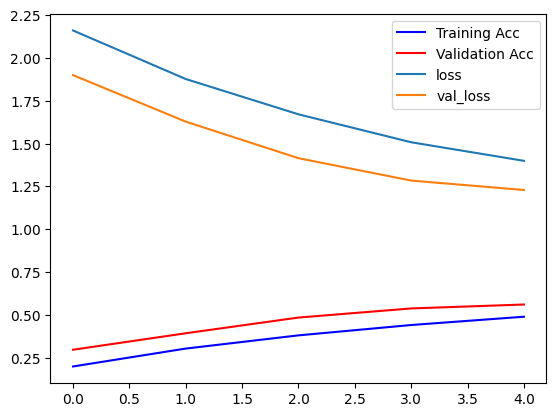

<Figure size 640x480 with 0 Axes>

In [41]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs=range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="Training Acc")
plt.plot(epochs, val_accuracy, "r", label="Validation Acc")
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.legend()
plt.figure()